In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## data cleaning

In [2]:
data = pd.read_csv("Satisfaction with the choice of your study program (Antworten) - Formularantworten 1.csv")

data.columns

Index(['Zeitstempel', 'What is your gender?',
       'How old are you? (please enter the years)',
       'What is your highest level of education?', 'Where are you from?',
       'What did you study?', 'For how many semesters did you study?',
       'Do you like the area/field of your study program?',
       'If you were not satisfied, after how many semesters did you realise that you dislike the program?',
       'Were your expectations regarding the study program met?',
       'Did you finish the degree?',
       'Did you ever wish you would have studied something else?',
       'What was your motivation to study this program? (multiple answers possible)',
       'Did you study during the pandemic?',
       'With your current knowledge, would you choose your program again?',
       'Is your work related to what you studied?',
       'How old were you when you started to study? (please enter the years)',
       'How many years before starting university did you decide what to study?',

In [3]:
data.rename(columns={'What is your gender?': "Gender", 'How old are you? (please enter the years)': "Age", 
'What is your highest level of education?': "Level of Education", 'Where are you from?': "Country",
"What did you study?": "Field of study", 'For how many semesters did you study?': "Duration of studies in semesters",
'Do you like the area/field of your study program?': "Liking field of studies", 
"If you were not satisfied, after how many semesters did you realise that you dislike the program?" : "Start of dislike",
'Were your expectations regarding the study program met?':"Expectations met", 'Did you finish the degree?': "Degree finished",
'Did you ever wish you would have studied something else?': "Wished to study something else",
'What was your motivation to study this program? (multiple answers possible)': "Motivation to study",
'Did you study during the pandemic?': "Studied during pandemic",
'With your current knowledge, would you choose your program again?': "Choose program again?",
'Is your work related to what you studied?': "Work related to studies?",
'How old were you when you started to study? (please enter the years)':"Age start of university",
'How many years before starting university did you decide what to study?': "Years decision made before start",
'Were you convinced by your choice when you started to study?': "Convinced of decision at beginning",
'What would have helped you in the decision-making process? (multiple answers possible)': "Possible help for decision making"}, inplace=True)

In [4]:
data.drop(columns = "Zeitstempel", inplace=True)
data.drop(columns = "Duration of studies in semesters", inplace=True)
data.drop(columns = "Degree finished", inplace=True)
data.drop(columns = "Age start of university", inplace=True)
data.drop(columns = "Level of Education", inplace=True)



In [5]:
data["Start of dislike"].value_counts()

I was satisfied    88
2                  18
1                  18
4                   8
3                   7
6                   4
5                   4
> 10                3
8                   1
9                   1
7                   1
Name: Start of dislike, dtype: int64

In [6]:
data["Start of dislike"].replace("> 10",11, inplace=True)
data["Start of dislike"].replace("I was satisfied",0, inplace=True)
data["Start of dislike"]= data["Start of dislike"].astype(int)

In [7]:
data["Years decision made before start"].replace("> 10",11, inplace=True)
data["Years decision made before start"] = data["Years decision made before start"].astype(int)


In [8]:
#df['New Group'] = np.where(df['Old Group'].str.contains("Stark"), 'Stark Family', 'Other')

#data["Peer pressure"] = np.where(data["Motivation to study"].str.contains("Peer pressure"),1,0)
data["Interest in the field"] = np.where(data["Motivation to study"].str.contains("Interest in the field"),1,0)
data["Money"] = np.where(data["Motivation to study"].str.contains("Money"),1,0)
data["Reputation"] = np.where(data["Motivation to study"].str.contains("Reputation"),1,0)
data["Limited Possibilities"] = np.where(data["Motivation to study"].str.contains("Limited Possibilities"),1,0)
data["Advise from friends/family"] = np.where(data["Motivation to study"].str.contains("Advise from friends/family"),1,0)
#data["Advise from school"] = np.where(data["Motivation to study"].str.contains("Advise from school"),1,0)
data["Did not know what else to do"] = np.where(data["Motivation to study"].str.contains("Did not know what else to do"),1,0)
#data["Other"] = np.where(data["Motivation to study"].str.contains("Other"),1,0)


In [9]:
data["I did not need any help"] = np.where(data["Possible help for decision making"].str.contains("I did not need any help"),1,0)
data["More guidance/support from school"] = np.where(data["Possible help for decision making"].str.contains("More guidance/support from school"),1,0)
data["More guidance/support from parents/family"] = np.where(data["Possible help for decision making"].str.contains("More guidance/support from parents/family"),1,0)
data["Work/internship before going to university"] = np.where(data["Possible help for decision making"].str.contains("Work/internship before going to university"),1,0)
data["Better orientation offers from university"] = np.where(data["Possible help for decision making"].str.contains("Better orientation offers from university"),1,0)
data["other"] = np.where(data["Possible help for decision making"].str.contains("other"),1,0)

In [10]:
data["Disliked?"] = np.where(data["Start of dislike"] > 0,1,0)


In [11]:
def age_group(row):
    if row["Age"] < 22: 
        val = 1
    elif row["Age"] < 26:
        val = 2
    elif row["Age"] < 31:
        val = 3
    else:
        val = 4
    return val

data["Age group"] = data.apply(age_group, axis=1)

In [12]:
data = data[data["Age"] >= 17]

In [13]:
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”

data.loc[data["Field of study"] == "Engineering", "Field of study"] = "Engineering/NaturaS/ComputerS"
data.loc[data["Field of study"] == "Natural Science", "Field of study"] = "Engineering/NaturaS/ComputerS"
data.loc[data["Field of study"] == "Computer Science", "Field of study"] = "Engineering/NaturaS/ComputerS"

data.loc[data["Field of study"] == "Media/Journalism", "Field of study"] = "Media/Journalism/Language"
data.loc[data["Field of study"] == "Language", "Field of study"] = "Media/Journalism/Language"

data.loc[data["Field of study"] == "Social Science", "Field of study"] = "SocialS/EducationalS/PoliticalS"
data.loc[data["Field of study"] == "Educational Science", "Field of study"] = "SocialS/EducationalS/PoliticalS"
data.loc[data["Field of study"] == "Political Science", "Field of study"] = "SocialS/EducationalS/PoliticalS"

data.loc[data["Field of study"] == "Music/Arts", "Field of study"] = "other"
data.loc[data["Field of study"] == "Law", "Field of study"] = "other"

data["Field of study"].value_counts()

Business/Management/Economics      63
Engineering/NaturaS/ComputerS      30
other                              21
Medicine/Psychology                18
Media/Journalism/Language          10
SocialS/EducationalS/PoliticalS    10
Name: Field of study, dtype: int64

## Data exploring

In [14]:
len(data)

152

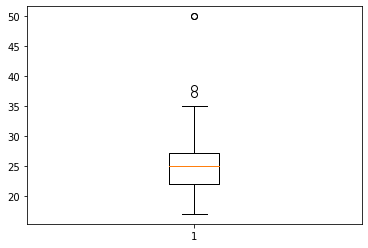

In [15]:
plt.boxplot(data["Age"])
plt.show()

In [16]:
data.corr()

,Age,Liking field of studies,Start of dislike,Expectations met,Years decision made before start,Convinced of decision at beginning,Interest in the field,Money,Reputation,Limited Possibilities,Advise from friends/family,Did not know what else to do,I did not need any help,More guidance/support from school,More guidance/support from parents/family,Work/internship before going to university,Better orientation offers from university,other,Disliked?,Age group
Age,1.000000,0.017888,0.081841,0.052533,-0.034662,-0.091128,-0.110864,-0.037071,0.032128,-6.725790e-02,-0.035386,-3.729937e-02,0.135755,-0.046408,-0.005555,-0.041286,-0.073189,0.033632,0.069258,0.865324
Liking field of studies,0.017888,1.000000,-0.401524,0.766432,0.011460,0.359971,0.443106,0.014155,0.046069,-1.945375e-01,-0.083852,-1.925524e-01,0.239822,-0.048145,-0.192552,-0.085006,-0.131698,0.013686,-0.528771,0.021700
Start of dislike,0.081841,-0.401524,1.000000,-0.328685,0.004012,-0.061483,-0.250862,0.046336,0.060357,2.690746e-01,-0.002423,4.643507e-02,-0.056838,0.018457,0.165840,0.008199,0.093419,0.119523,0.691218,0.075831
Expectations met,0.052533,0.766432,-0.328685,1.000000,-0.058434,0.375860,0.339674,-0.049237,0.037408,-1.835542e-01,-0.115274,-1.707054e-01,0.275128,-0.073119,-0.229443,-0.118765,-0.057322,-0.100736,-0.456639,0.062031
Years decision made before start,-0.034662,0.011460,0.004012,-0.058434,1.000000,0.114855,0.104271,0.114206,0.129939,-4.088302e-02,0.080015,-1.366501e-01,0.126744,-0.127052,-0.100807,-0.122385,-0.085936,0.040157,0.052371,-0.040773
Convinced of decision at beginning,-0.091128,0.359971,-0.061483,0.375860,0.114855,1.000000,0.358240,0.034295,-0.014435,-1.608389e-01,-0.043401,-3.044758e-01,0.327446,-0.236047,-0.118694,-0.175240,-0.166351,-0.001423,-0.110027,-0.129306
Interest in the field,-0.110864,0.443106,-0.250862,0.339674,0.104271,0.358240,1.000000,-0.016412,-0.055567,-2.030052e-01,-0.021439,-3.383420e-01,0.174474,-0.005828,-0.183671,-0.039161,-0.021658,-0.006221,-0.291010,-0.153742
Money,-0.037071,0.014155,0.046336,-0.049237,0.114206,0.034295,-0.016412,1.000000,0.255965,-7.276069e-02,0.101669,8.084521e-02,-0.063013,0.159712,0.145521,0.075864,0.111634,0.040132,0.130718,-0.106400
Reputation,0.032128,0.046069,0.060357,0.037408,0.129939,-0.014435,-0.055567,0.255965,1.000000,2.561578e-03,0.064428,3.073893e-02,-0.018408,0.101209,-0.010246,0.119366,0.017334,0.025432,0.190452,0.069364
Limited Possibilities,-0.067258,-0.194538,0.269075,-0.183554,-0.040883,-0.160839,-0.203005,-0.072761,0.002562,1.000000e+00,-0.006523,2.544261e-17,-0.096738,0.081154,0.083333,0.068662,0.142884,0.030643,0.099808,-0.028151


In [17]:
print(data["Age"].mean())
print(data["Age"].median())
print(data["Age"].min())
print(data["Age"].max())

25.49342105263158
25.0
17
50


In [18]:
data["Country"].nunique()

34

In [19]:
data["Field of study"].value_counts()

Business/Management/Economics      63
Engineering/NaturaS/ComputerS      30
other                              21
Medicine/Psychology                18
Media/Journalism/Language          10
SocialS/EducationalS/PoliticalS    10
Name: Field of study, dtype: int64

In [20]:
data["Age"].value_counts().sort_index()

17     1
19     6
20     5
21     7
22    21
23    20
24    15
25    16
26    10
27    13
28     8
29     8
30     5
31     5
32     2
33     2
34     2
35     2
37     1
38     1
50     2
Name: Age, dtype: int64

In [21]:
data["Age group"].value_counts().sort_index()

1    19
2    72
3    44
4    17
Name: Age group, dtype: int64

In [22]:
data["Country"].value_counts()

Germany                           25
Albania                           22
Netherlands                       16
United States of America (USA)     9
Portugal                           7
United Kingdom (UK)                7
India                              6
Moldova                            5
Syria                              5
China                              5
Spain                              4
France                             4
Ukraine                            3
Australia                          3
Brazil                             3
Azerbaijan                         3
Iran                               2
Poland                             2
Morocco                            2
South Korea                        2
Indonesia                          2
Belgium                            2
Canada                             2
Vietnam                            1
Turkey                             1
South Africa                       1
Algeria                            1
I

In [23]:
data.groupby("Field of study").agg({"Liking field of studies": "mean", 
    "Convinced of decision at beginning": "mean",
    "Years decision made before start": "mean", 
    "Expectations met": "mean"})

,Liking field of studies,Convinced of decision at beginning,Years decision made before start,Expectations met
Field of study,,,,
Business/Management/Economics,7.158730,6.936508,1.809524,6.507937
Engineering/NaturaS/ComputerS,7.466667,7.400000,1.566667,6.566667
Media/Journalism/Language,7.400000,6.600000,1.200000,6.600000
Medicine/Psychology,8.277778,7.444444,2.666667,7.222222
SocialS/EducationalS/PoliticalS,7.400000,7.800000,1.700000,6.800000
other,7.285714,6.857143,1.285714,6.190476


In [24]:
data["Start of dislike"].value_counts()

0     87
2     18
1     18
4      8
3      7
6      4
5      4
11     3
9      1
8      1
7      1
Name: Start of dislike, dtype: int64

In [25]:
disliked = data.loc[data["Start of dislike"] > 0]


In [26]:
len(disliked)/len(data)

0.4276315789473684

In [27]:
disliked.groupby("Field of study").agg({"Start of dislike": "mean"}).sort_values("Start of dislike")

,Start of dislike
Field of study,
Media/Journalism/Language,1.500000
SocialS/EducationalS/PoliticalS,2.250000
Engineering/NaturaS/ComputerS,3.000000
other,3.300000
Business/Management/Economics,3.310345
Medicine/Psychology,4.250000


In [28]:
data.groupby("Gender").agg({"Liking field of studies": "mean", 
    "Years decision made before start": "mean", 
    "Expectations met": "mean",
    "Convinced of decision at beginning": "mean"})

,Liking field of studies,Years decision made before start,Expectations met,Convinced of decision at beginning
Gender,,,,
Female,7.565217,1.641304,6.739130,7.293478
Male,7.220339,1.915254,6.389831,6.830508
Non-binary,3.000000,1.000000,4.000000,7.000000


In [29]:
data["Years decision made before start"].value_counts()

1     104
2      27
3       8
5       5
4       3
11      2
10      1
8       1
6       1
Name: Years decision made before start, dtype: int64

In [30]:
data.groupby("Age group").agg({"Liking field of studies": "mean", 
    "Years decision made before start": "mean", 
    "Expectations met": "mean", 
    "Convinced of decision at beginning": "mean"})

,Liking field of studies,Years decision made before start,Expectations met,Convinced of decision at beginning
Age group,,,,
1,7.473684,2.157895,6.000000,7.789474
2,7.319444,1.513889,6.666667,7.166667
3,7.454545,2.159091,6.704545,6.886364
4,7.529412,1.176471,6.588235,6.705882


In [31]:
data.groupby("Studied during pandemic").agg({"Liking field of studies": "mean", 
    "Years decision made before start": "mean", 
    "Expectations met": "mean", 
    "Convinced of decision at beginning": "mean"})



,Liking field of studies,Years decision made before start,Expectations met,Convinced of decision at beginning
Studied during pandemic,,,,
No,7.312500,2.218750,6.375000,7.000000
"Yes, I graduated during the pandemic",7.263158,1.342105,6.552632,7.131579
"Yes, I started during the pandemic",7.750000,2.464286,6.857143,7.428571
"Yes, I was already studying and I still am",7.370370,1.370370,6.592593,7.000000


In [32]:
data.groupby(['Field of study','Wished to study something else']).size().unstack(fill_value=0)

Wished to study something else,No,"Yes, after I graduated","Yes, already while studying"
Field of study,,,
Business/Management/Economics,28,8,27
Engineering/NaturaS/ComputerS,16,6,8
Media/Journalism/Language,5,2,3
Medicine/Psychology,12,2,4
SocialS/EducationalS/PoliticalS,4,1,5
other,8,4,9


In [33]:
data.groupby(['Field of study','Choose program again?']).size().unstack(fill_value=0)

Choose program again?,"No, I would not study at all","No, I would study something else","Yes, I would do the same"
Field of study,,,
Business/Management/Economics,0,29,34
Engineering/NaturaS/ComputerS,1,10,19
Media/Journalism/Language,0,4,6
Medicine/Psychology,0,4,14
SocialS/EducationalS/PoliticalS,1,2,7
other,0,11,10


In [34]:
data.groupby(['Field of study','Work related to studies?']).size().unstack(fill_value=0)

Work related to studies?,I am still a student/just graduated,No,Yes
Field of study,,,
Business/Management/Economics,32,11,20
Engineering/NaturaS/ComputerS,11,5,14
Media/Journalism/Language,4,2,4
Medicine/Psychology,6,0,12
SocialS/EducationalS/PoliticalS,5,1,4
other,7,7,7


In [35]:
a = pd.DataFrame({"yes":data[data["Studied during pandemic"] != "No"]["Liking field of studies"]})
b = pd.DataFrame({"no": data[data["Studied during pandemic"] == "No"]["Liking field of studies"]})


In [36]:
data.groupby(['Field of study', 'Interest in the field']).size().unstack(fill_value=0)


Interest in the field,0,1
Field of study,,
Business/Management/Economics,13,50
Engineering/NaturaS/ComputerS,7,23
Media/Journalism/Language,3,7
Medicine/Psychology,3,15
SocialS/EducationalS/PoliticalS,0,10
other,3,18


In [37]:
data.groupby(['Field of study', 'Money']).size().unstack(fill_value=0)


Money,0,1
Field of study,,
Business/Management/Economics,36,27
Engineering/NaturaS/ComputerS,20,10
Media/Journalism/Language,10,0
Medicine/Psychology,12,6
SocialS/EducationalS/PoliticalS,10,0
other,14,7


In [38]:
data["Expectations met"].sum()

1001

In [39]:
for column in data.columns:
    if data[column].dtype == int:
        print(column, data[column].sum())

Age 3875
Liking field of studies 1125
Start of dislike 208
Expectations met 1001
Years decision made before start 265
Convinced of decision at beginning 1081
Interest in the field 123
Money 50
Reputation 25
Limited Possibilities 24
Advise from friends/family 39
Did not know what else to do 38
I did not need any help 33
More guidance/support from school 62
More guidance/support from parents/family 38
Work/internship before going to university 83
Better orientation offers from university 70
other 10
Disliked? 65
Age group 363


In [40]:
data.to_csv("finaltable.csv")

## possible questions

In [41]:
alpha = 0.05

In [42]:
# pandemic did not have a negative impact on satisfaction 

# independent samples

# H0: mu_no <= mu_yes
# H1: mu_no > mu_yes

stats, p = st.ttest_ind(b, a, equal_var=False)

print(stats)
p/2 < alpha

# we do not reject H0

[-0.25086082]


array([False])

In [43]:
# pandemic did not have a negative impact on expectations met

# independent samples

# H0: mu_no <= mu_yes
# H1: mu_no > mu_yes

stats, p = st.ttest_ind(data[data["Studied during pandemic"] == "No"]["Expectations met"], data[data["Studied during pandemic"] != "No"]["Expectations met"], equal_var=False)

print(stats)
p/2 < alpha

# we do not reject H0

-0.5897572355566548


False

In [44]:
# Business students like their studies less than others

# H0: mu_bus >= mu_oth
# H1: mu_bus < mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "Business/Management/Economics"]["Liking field of studies"],data[data["Field of study"] != "Business/Management/Economics"]["Liking field of studies"], equal_var=False)

print(stats)
p/2 < alpha

# we don't reject H0

-1.3215660800956113


False

In [45]:
# Business students like their studies less than others

# H0: mu_bus <= mu_oth
# H1: mu_bus > mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "Business/Management/Economics"]["Disliked?"],data[data["Field of study"] != "Business/Management/Economics"]["Disliked?"], equal_var=False)

print(stats)
p/2 < alpha


0.6797531418352584


False

In [46]:
# Young people have less expecations met

# H0: mu_young <= mu_old
# H1: mu_young > mu_old

stats, p = st.ttest_ind(data[data["Age"] < 22]["Expectations met"],data[data["Age"] > 30]["Expectations met"], equal_var=False)

print(stats)
p/2 < alpha

# we do not reject H0

-0.8082860439596995


False

In [47]:
# Young people were more convinced at beginning

# H0: mu_young <= mu_old
# H1: mu_young > mu_old

stats, p = st.ttest_ind(data[data["Age"] < 22]["Convinced of decision at beginning"],data[data["Age"] > 30]["Convinced of decision at beginning"], equal_var=False)

print(stats)
p/2 < alpha

1.4388609950674378


False

In [48]:
# business people study for money

# HO: mu_bu <= mu_oth
# HO: mu_bu > mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "Business/Management/Economics"]["Money"],data[data["Field of study"] != "Business/Management/Economics"]["Money"], equal_var=False)

print(stats)
p/2 < alpha


# we can reject H0

2.1735432017043803


True

In [49]:
# business people study because they dont know what else to do

# HO: mu_bu <= mu_oth
# H1: mu_bu > mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "Business/Management/Economics"]["Did not know what else to do"],data[data["Field of study"] != "Business/Management/Economics"]["Did not know what else to do"], equal_var=False)

print(stats)
p/2 < alpha


# we can reject H0

3.4516065532012767


True

In [50]:
# medical students study for reputation

# H0: mu_med <= mu_oth
# H1: mu_med > mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "Medicine/Psychology"]["Reputation"],data[data["Field of study"] != "Medicine/Psychology"]["Reputation"], equal_var=False)

print(stats)
p/2 < alpha

# we reject H0

2.0886688867602294


True

In [68]:
data["Field of study"].value_counts()

Business/Management/Economics      63
Engineering/NaturaS/ComputerS      30
other                              21
Medicine/Psychology                18
Media/Journalism/Language          10
SocialS/EducationalS/PoliticalS    10
Name: Field of study, dtype: int64

In [70]:
# social(educational, political) students study for reputation

# H0: mu_med <= mu_oth
# H1: mu_med > mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "SocialS/EducationalS/PoliticalS"]["Interest in the field"],data[data["Field of study"] != "SocialS/EducationalS/PoliticalS"]["Interest in the field"], equal_var=False)

print(stats)
p/2 < alpha

6.015466790529607


True

In [51]:
# Medical students like their studies more than others

# H0: mu_med <= mu_oth
# H1: mu_med > mu_oth

stats, p = st.ttest_ind(data[data["Field of study"] == "Medicine/Psychology"]["Liking field of studies"],data[data["Field of study"] != "Medicine/Psychology"]["Liking field of studies"], equal_var=False)

print(stats)
p/2 < alpha

# we can be reject H0

2.7377088392332554


True

In [52]:
# people who like the field of studies have expectations met


In [53]:
#  people who like their field of studies chose their study program based on interest

In [54]:
# people whose expectations were met chose their study program based on interest

In [55]:
# people who were convinced at the beginning chose their study program based on interest

In [56]:
# females like their field of studies more than male

# H0: mu_w <= mu_m
# H1: mu_w > mu_m

stats, p = st.ttest_ind(data[data["Gender"] == "Female"]["Liking field of studies"],data[data["Gender"] == "Male"]["Liking field of studies"], equal_var=False)

print(stats)
p/2 < alpha

# we do not reject H0

1.0761383977918264


False

In [57]:
# females have their expectations met more than male

# H0: mu_w <= mu_m
# H1: mu_w > mu_m

stats, p = st.ttest_ind(data[data["Gender"] == "Female"]["Expectations met"],data[data["Gender"] == "Male"]["Expectations met"], equal_var=False)

print(stats)
p/2 < alpha

# we do not reject H0

0.9956661263608481


False

In [58]:
# females were more convinced at the beginning than male

# H0: mu_w <= mu_m
# H1: mu_w > mu_m

stats, p = st.ttest_ind(data[data["Gender"] == "Female"]["Convinced of decision at beginning"],data[data["Gender"] == "Male"]["Convinced of decision at beginning"], equal_var=False)

print(stats)
p/2 < alpha

# we do not reject H0

1.2458032287125682


False

## Naive Bayes

In [59]:
data.columns

Index(['Gender', 'Age', 'Country', 'Field of study', 'Liking field of studies',
       'Start of dislike', 'Expectations met',
       'Wished to study something else', 'Motivation to study',
       'Studied during pandemic', 'Choose program again?',
       'Work related to studies?', 'Years decision made before start',
       'Convinced of decision at beginning',
       'Possible help for decision making', 'Interest in the field', 'Money',
       'Reputation', 'Limited Possibilities', 'Advise from friends/family',
       'Did not know what else to do', 'I did not need any help',
       'More guidance/support from school',
       'More guidance/support from parents/family',
       'Work/internship before going to university',
       'Better orientation offers from university', 'other', 'Disliked?',
       'Age group'],
      dtype='object')

In [60]:
model = data[["Liking field of studies","Gender","Age group", "Field of study", "Convinced of decision at beginning", 'Interest in the field', 'Money', 'Reputation','Limited Possibilities', 'Advise from friends/family', 'Did not know what else to do']]

model.head()

,Liking field of studies,Gender,Age group,Field of study,Convinced of decision at beginning,Interest in the field,Money,Reputation,Limited Possibilities,Advise from friends/family,Did not know what else to do
0,2,Female,2,Business/Management/Economics,6,0,1,0,0,0,1
1,7,Female,2,Business/Management/Economics,7,1,0,0,1,1,0
2,9,Female,2,Medicine/Psychology,10,1,0,0,0,0,0
3,9,Male,2,Business/Management/Economics,9,1,1,0,0,0,0
4,8,Female,2,Business/Management/Economics,8,1,1,0,0,0,1


In [61]:
#df['New Group'] = np.where(df['Old Group'].str.contains("Stark"), 'Stark Family', 'Other')

model["Female"] = np.where(model["Gender"].str.contains("Female"),1,0)
model["Male"] = np.where(model["Gender"].str.contains("Male"),1,0)
model.drop(columns = "Gender", inplace=True)


/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/2193253117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Female"] = np.where(model["Gender"].str.contains("Female"),1,0)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/2193253117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Male"] = np.where(model["Gender"].str.contains("Male"),1,0)
/Users/medea/opt/anaconda3/envs/projectsql/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning

In [62]:
model["Age_1"] = np.where(model["Age group"]==1, 1, 0)
model["Age_2"] = np.where(model["Age group"]==2, 1, 0)
model["Age_3"] = np.where(model["Age group"]==3, 1, 0)
model["Age_4"] = np.where(model["Age group"]==4, 1, 0)
model.drop(columns = "Age group", inplace=True)

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/3347688452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Age_1"] = np.where(model["Age group"]==1, 1, 0)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/3347688452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Age_2"] = np.where(model["Age group"]==2, 1, 0)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/3347688452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [63]:
model["Convinced"] = np.where(model["Convinced of decision at beginning"] > 6, 1,0)
model["Not_Convinced"] = np.where(model["Convinced of decision at beginning"] < 7, 1,0)
model.drop(columns = "Convinced of decision at beginning", inplace=True)

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/405240556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Convinced"] = np.where(model["Convinced of decision at beginning"] > 6, 1,0)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/405240556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Not_Convinced"] = np.where(model["Convinced of decision at beginning"] < 7, 1,0)
/Users/medea/opt/anaconda3/envs/projectsql/lib/python3.8/site-packages/pandas/core/frame

In [64]:
# model["Business/Management/Economics"] = np.where(model["Liking field of studies"].str.contains("Business/Management/Economics"),1,0)
# model["Engineering/Natural Science/Computer Science"] = np.where(model["Liking field of studies"].str.contains("Engineering") | model["Liking field of studies"].str.contains("Natural Science") | model["Liking field of studies"].str.contains("Computer Science"),1,0)
# model["Medicine/Psychology"] = np.where(model["Liking field of studies"].str.contains("Medicine/Psychology"),1,0)
# model["other"] = np.where(model["Liking field of studies"].str.contains("other") | model["Liking field of studies"].str.contains("Law") | model["Liking field of studies"].str.contains("Music/Arts"),1,0)
# model["Media/Journalism/Language"] = np.where(model["Liking field of studies"].str.contains("Media/Journalism") | model["Liking field of studies"].str.contains("Language"),1,0)
# model["Social Science/Educational Science/Political Science"] = np.where(model["Liking field of studies"].str.contains("Social Science") | model["Liking field of studies"].str.contains("Educational Science") | model["Liking field of studies"].str.contains("Political Science"),1,0)
# model.drop(columns = "Field of study", inplace=True)


In [65]:
model["Liking"] = np.where(model["Liking field of studies"] > 6, 1,0)
#model["Not_Liking"] = np.where(model["Liking field of studies"] < 7, 1,0)
model.drop(columns = "Liking field of studies", inplace=True)

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1371/390077899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["Liking"] = np.where(model["Liking field of studies"] > 6, 1,0)
/Users/medea/opt/anaconda3/envs/projectsql/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
x = pd.get_dummies(model['Field of study'])

In [67]:
model_new = x.join(model)
model_new

,Business/Management/Economics,Engineering/NaturaS/ComputerS,Media/Journalism/Language,Medicine/Psychology,SocialS/EducationalS/PoliticalS,other,Field of study,Interest in the field,Money,Reputation,...,Did not know what else to do,Female,Male,Age_1,Age_2,Age_3,Age_4,Convinced,Not_Convinced,Liking
0,1,0,0,0,0,0,Business/Management/Economics,0,1,0,...,1,1,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,Business/Management/Economics,1,0,0,...,0,1,0,0,1,0,0,1,0,1
2,0,0,0,1,0,0,Medicine/Psychology,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,0,0,Business/Management/Economics,1,1,0,...,0,0,1,0,1,0,0,1,0,1
4,1,0,0,0,0,0,Business/Management/Economics,1,1,0,...,1,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1,0,0,0,0,0,Business/Management/Economics,1,1,1,...,0,0,1,1,0,0,0,1,0,1
149,0,1,0,0,0,0,Engineering/NaturaS/ComputerS,0,1,0,...,1,1,0,0,0,0,1,0,1,0
150,1,0,0,0,0,0,Business/Management/Economics,1,0,0,...,1,1,0,1,0,0,0,1,0,1
151,0,0,0,0,0,1,other,1,0,0,...,0,1,0,0,1,0,0,0,1,1
